# fastText y clustering espectral

fasText es un método, creado por Facebook, para generar representaciones vectoriales de palabras (embeddings). Es similar a Word2Vec pero tiene la característica de modelar no sólo palabras completas sino también subcadenas (subwords). Gracias a esto, y a la noción  de "composición", puede construir la representación de una palabra que nunca vio en el entrenamiento, a partir de la combinación de l representaciones de sus partes/subcadenas. 

En este notebook entrenaremos representaciones fastText a partir de un corpus en español y posteriormente realizaremos agrupamiento usando la técnica de clustering espectral.


## 1. Representación vectorial de palabras con fastText

Vamos a instalar fastText de manera nativa usando el repositorio de github y la línea de comandos:



In [1]:
!wget https://github.com/facebookresearch/fastText/archive/v0.9.1.zip
!unzip v0.9.1.zip
%cd fastText-0.9.1
!make

--2020-11-26 10:46:09--  https://github.com/facebookresearch/fastText/archive/v0.9.1.zip
Resolviendo github.com (github.com)... 140.82.112.3
Conectando con github.com (github.com)[140.82.112.3]:443... conectado.
Petición HTTP enviada, esperando respuesta... 302 Found
Ubicación: https://codeload.github.com/facebookresearch/fastText/zip/v0.9.1 [siguiente]
--2020-11-26 10:46:09--  https://codeload.github.com/facebookresearch/fastText/zip/v0.9.1
Resolviendo codeload.github.com (codeload.github.com)... 140.82.114.10
Conectando con codeload.github.com (codeload.github.com)[140.82.114.10]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: no especificado [application/zip]
Guardando como: “v0.9.1.zip”

v0.9.1.zip              [            <=>     ]   4.13M   465KB/s    en 10s     

2020-11-26 10:46:20 (422 KB/s) - “v0.9.1.zip” guardado [4327207]

Archive:  v0.9.1.zip
b5b7d307274ce00ef52198fbc692ed3bd11d9856
   creating: fastText-0.9.1/
   creating: fastText-0.9.1/

  inflating: fastText-0.9.1/website/static/docs/en/html/structfasttext_1_1entry.js  
 extracting: fastText-0.9.1/website/static/docs/en/html/sync_off.png  
 extracting: fastText-0.9.1/website/static/docs/en/html/sync_on.png  
 extracting: fastText-0.9.1/website/static/docs/en/html/tab_a.png  
 extracting: fastText-0.9.1/website/static/docs/en/html/tab_b.png  
 extracting: fastText-0.9.1/website/static/docs/en/html/tab_h.png  
 extracting: fastText-0.9.1/website/static/docs/en/html/tab_s.png  
  inflating: fastText-0.9.1/website/static/docs/en/html/tabs.css  
  inflating: fastText-0.9.1/website/static/docs/en/html/utils_8cc.html  
  inflating: fastText-0.9.1/website/static/docs/en/html/utils_8cc.js  
  inflating: fastText-0.9.1/website/static/docs/en/html/utils_8h.html  
  inflating: fastText-0.9.1/website/static/docs/en/html/utils_8h.js  
  inflating: fastText-0.9.1/website/static/docs/en/html/utils_8h_source.html  
  inflating: fastText-0.9.1/website/static/docs/en/html/vector_8cc.htm

Una vez instalado fasText, podemos empezar a entrenar modelos de representaciones vectoriales a partir de un corpus.

Montamos el sistema de archivos de Drive:


In [0]:
#Montamos el contenido de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Para entrenar el método de Fasttext, utilizaremos la combinación de dos corpus pequeños: a) el Corpus del Español Mexicano COntemporáneo (CEMC); y b) el corpus paralelo náhuatl-español Axolotl (la parte en español). 


El entrenamiento se hace a través de la línea de comandos, se pueden específicar diversos hiperparámetros ([Consultar documentación](https://fasttext.cc/docs/en/unsupervised-tutorial.html)). Dos parámetros necesarios son el archivo input y el archivo output, que generará el entrenamiento.

In [0]:
#Se generan dos archivos: cemc.bin (modelo) y cemc.vec (este último es literalmente un archivo de texto con un vector por línea)
#Se pueden descargar usando el visualizador de archivos (pestaña izq.) fastText-0.9.1/result
!mkdir result 
!./fasttext cbow -input /content/drive/My\ Drive/Curso_RIIAA/data/cemcytodo.txt  -output result/cemc

Read 2M words
Number of words:  24951
Number of labels: 0
Progress: 100.0% words/sec/thread:   30425 lr:  0.000000 loss:  2.323974 ETA:   0h 0m


Una vez generado el modelo, podemos utilizar estos vectores de diferentes maneras, por ejemplo para una palabra devolver las palabras más cercanas/similares:










In [0]:
!./fasttext nn result/cemc.bin

Query word? tortilla
pipa 0.968546
cuchilla 0.965917
tortillita 0.963624
mochila 0.961793
charola 0.955275
cazuela 0.950224
piña 0.944366
chava 0.93888
mojarra 0.935765
tortuga 0.935342
Query word? méxico
norteamericano 0.906974
universitario 0.902646
universidá 0.890821
mexico 0.886792
university 0.881653
mexicano 0.871778
mexicali 0.871125
méx 0.857005
latinoamericano 0.839692
italiano 0.836293
Query word? azteca
zapoteca 0.971951
orilla 0.941215
bonilla 0.936842
barbilla 0.93559
zorrilla 0.934385
polla 0.933695
chueca 0.932377
azuela 0.932094
chilena 0.930416
borbolla 0.928953
Query word? ^C


#2. Cargando los vectores en Python
Podemos cargar los modelos obtenidos de Fasttext y manipularlos directamente desde python, utilizando el paquete gensim.

In [0]:
# Install / Upgrade Gensim
!pip install --upgrade gensim

     |████████████████████████████████| 24.2MB 69.8MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


Cargamos el modelo:

In [0]:
from gensim.models.wrappers import FastText

#Carga modelo pre-entrenado
model = FastText.load_fasttext_format('result/cemc')


Una vez cargado el modelo podemos jugar con los vectores directamente desde python. Aquí también se pueden buscar palabras similares o bien determinar la similitud entre una y otra palabra:


In [0]:
#Buscar las palabras más similares a query
print(model.most_similar('azteca'))
print(model.most_similar('mexicano'))

#Similitud entre dos palabras dasdas
print(model.similarity('mexico', 'país'))

[('zapoteca', 0.9719510078430176), ('orilla', 0.9412146806716919), ('bonilla', 0.9368422627449036), ('barbilla', 0.9355900883674622), ('zorrilla', 0.934384822845459), ('polla', 0.9336952567100525), ('chueca', 0.9323766827583313), ('azuela', 0.9320937395095825), ('chilena', 0.9304165244102478), ('borbolla', 0.9289524555206299)]
[('americano', 0.9667645692825317), ('mexico', 0.9505746364593506), ('norteamericano', 0.9450423717498779), ('africano', 0.9262045621871948), ('republicano', 0.9257711172103882), ('latinoamericano', 0.9056142568588257), ('mexicanismo', 0.9027756452560425), ('universitario', 0.8979648351669312), ('organizador', 0.8943582773208618), ('italiano', 0.8912588357925415)]
0.31398705


Una de las ventajas de fastText es que, además de obtener los vectores de palabras que se encontraban en el vocabulario de entrenamiento, es capaz de construir representaciones vectoriales de palabras que no estaban en este vocabulario (*Out-Of-Vocabulary words, OOV*). Esto se realiza a través de una operación de composición de subwords.

In [0]:
#Palabra dentro del vocabulario
existent_word = "computadora"
print(existent_word in model.wv.vocab)
#Obtención del vector de esta palabra
vector_computadora = model.wv[existent_word]

#Palabra oov
oov_word = "computadorsota"
print(oov_word in model.wv.vocab)
#Obtención del vector de oov
vector_oov = model.wv[oov_word]

#Similitud entre ambos
print(model.similarity(existent_word, oov_word))

True
False
0.9610355


#3. Agrupamiento con spectral clustering

Una vez obtenidos los vectores de Fasttext, podemos aplicar el algoritmo de spectral clustering, vamos a agrupar y visualizar los datos obtenidos.

In [0]:
#Paquetería necesaria
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import networkx as nx
from scipy.linalg import eig
from operator import itemgetter

Dado que Fasttext permite representar palabras OOV, podemos darle cualquier lista arbitraría de léxico y obtener vectores que los representen.

In [0]:
#Lista de palabras para trabajar
vocab_words = ['amo','amas','amamos','ama','aman','come','como','comemos','comen','toco','tocas','tocan','tocamos','gato','minino','gatito','gatos','mininos',
               'flor','flores','mininito','computadora','computadoras']

Obtenemos los vectores que representan a las palabras anteriores y los guardamos en un arreglo.

In [0]:
#Tamaño del vocabulario
N = len(vocab_words)

#Matrix de NxNúmero de dimmensiones
X = np.zeros((N,100))
#Llenamos la matriz con los vectores palabra
for i,w in enumerate(vocab_words):
  X[i] = model.wv[w]

print(X.shape)

(23, 100)


Podemos visualizar estos datos a partir de la siguiente función:

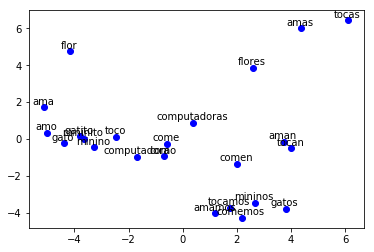

In [0]:
#Función para plotear
def plot_words(Z,ids,color='blue'):
    #Reduce a dos dimensiones con PCA
    Z = PCA(n_components=2).fit_transform(Z)
    r=0
    #Plotea las dimensiones
    plt.scatter(Z[:,0],Z[:,1], marker='o', c=color)
    for label,x,y in zip(ids, Z[:,0], Z[:,1]):
        #Agrega las etiquetas
        plt.annotate(label, xy=(x,y), xytext=(-1,1), textcoords='offset points', ha='center', va='bottom')
        r+=1

#Ploteo de los datos
plot_words(X, vocab_words)
plt.show()